# Time Series

The problems in this notebook correspond to the concepts covered in `Lectures/Supervised Learning/Time Series`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style("whitegrid")

##### 1. Happy birthday!

Write a `list` comprehension or `for` loop that contains every `datetime` for your birthday from the day you were born to now. Sorry if you were born on a leap day!

In [2]:
# code here
for i in np.arange(1994,2023):
    print(datetime.date(i,11,3))



1994-11-03
1995-11-03
1996-11-03
1997-11-03
1998-11-03
1999-11-03
2000-11-03
2001-11-03
2002-11-03
2003-11-03
2004-11-03
2005-11-03
2006-11-03
2007-11-03
2008-11-03
2009-11-03
2010-11-03
2011-11-03
2012-11-03
2013-11-03
2014-11-03
2015-11-03
2016-11-03
2017-11-03
2018-11-03
2019-11-03
2020-11-03
2021-11-03
2022-11-03


In [3]:
## code here




##### 2. Load data

- Load the data, `bike_google_trends.csv` from the `Data` folder, set aside the last 12 observations as a test set.

- Load the data, `goog_trend_pumpkin.csv` from the `Data` folder, set aside the last 12 observations as a test set.

In [4]:
bike = pd.read_csv("../../../Data/bike_google_trends.csv", parse_dates = ['Month'])

In [5]:
bike_test = bike.tail(12).copy()
bike_train = bike.drop(bike_test.index).copy()

In [6]:
pumpkin = pd.read_csv("../../../Data/goog_trend_pumpkin.csv", parse_dates = ['Month'])

In [7]:
pump_test = pumpkin.tail(12).copy()
pump_train = pumpkin.drop(pump_test.index).copy()

In [8]:
bike_train.head()

,Month,bike_interest
0,2004-01-01,28
1,2004-02-01,29
2,2004-03-01,38
3,2004-04-01,47
4,2004-05-01,59


##### 3. Seasonal differencing

In lecture we talked about first differencing non-stationary time series exhibiting a trend to create a, seemingly, stationary time series.

This can also be done for seasonal data. Suppose that we suspect a time series, $\left\lbrace y_t \right\rbrace$ exhibits seasonality where a season lasts $m$ time steps. Then the first seasonal differenced time series is:

$$
\nabla y_t = y_t - y_{t-m}.
$$

Plot the autocorrelation of the `bike_train` data set, then perform first differencing on these data and plot the autocorrelation of the first differenced series.

Does the differenced series appear less likely to violate stationarity?

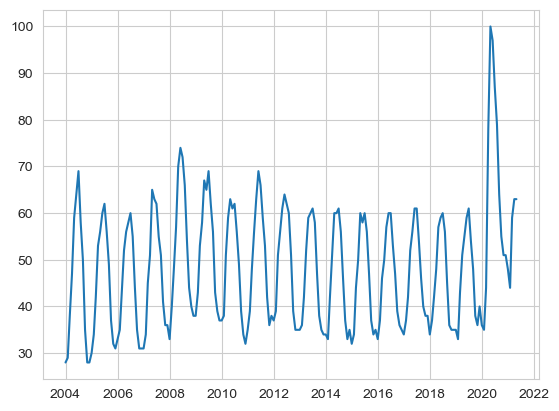

In [9]:
plt.plot(bike_train.Month,bike_train.bike_interest)

/Users/danieltuthill/anaconda3/envs/erdos/lib/python3.8/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/danieltuthill/anaconda3/envs/erdos/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


(0.0, 35.0)

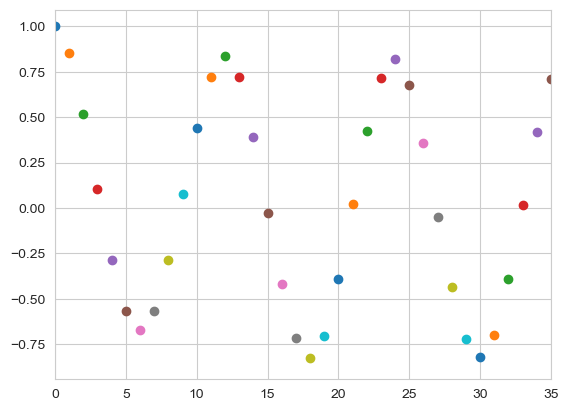

In [10]:
## code here
for i in np.arange(len(bike_train),step=1):
    plt.scatter(i,bike_train['bike_interest'].autocorr(lag=i))
plt.xlim((0,35))



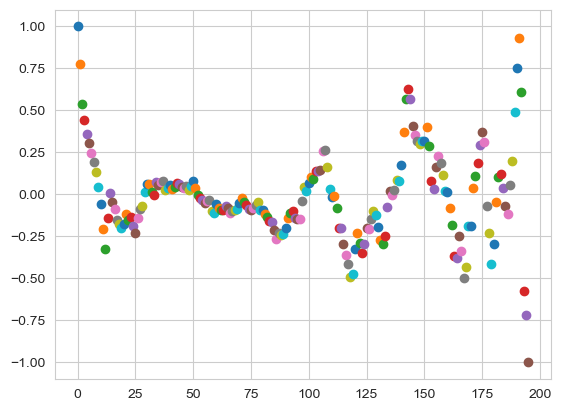

In [11]:
## code here
for i in np.arange(len(bike_train),step=1):
    plt.scatter(i,bike_train['bike_interest'].diff(12).autocorr(lag=i))
#plt.xlim((0,35))

In [12]:
## code here




In [13]:
## code here




##### 4. Plotting pumpkins

Plot the training data for the `goog_trend_pumpkin.csv` data.  In particular, plot the `pumpkin_trend` over time.

In [14]:
## code here
pumpkin.head()


,Month,pumpkin_trend,lag_5_value
0,2004-01-01,2,2.0
1,2004-02-01,2,2.0
2,2004-03-01,2,3.0
3,2004-04-01,2,8.0
4,2004-05-01,2,57.0


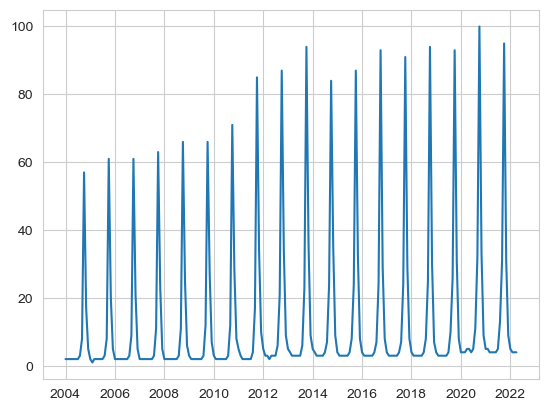

In [15]:
plt.plot(pumpkin.Month,pumpkin.pumpkin_trend)

##### 5. Baselines for seasonality AND trend

In `Lectures/Supervised Learning/Time Series Forecasting/4. Baseline Forecasts` we demonstrated six unique forecasts, none of which account for data with seasonality and trend. Here we will demonstrate two more baselines that do account for those.

##### a. Seasonal average with trend

The first just adds a trend component to the seasonal average baseline forecast:

$$
f(t) = \left\lbrace \begin{array}{l c c}\frac{1}{\left\lfloor n/m \right\rfloor + 1} \sum_{i=0}^{\left\lfloor n/m \right\rfloor} y_{t\%m + i*m} + \beta t + \epsilon, & \text{for} & t > n  \\
                                        y_t & \text{for} & t\leq n
                                        \end{array}\right.,
$$

where you can estimate $\beta$ with the average value of the first seasonal differences discussed in 3. above.

##### b. Seasonal naive with trend

The second adds a trend component to the seasonal naive forecast:

$$
f(t) = \left\lbrace \begin{array}{l c c}y_\tau + \beta(t-n) + \epsilon, & \text{for} & t > n  \\
                                        y_t & \text{for} & t\leq n
                                        \end{array}\right.,
$$

where 

$$
\tau = t - \left(\left\lfloor \frac{t - n}{m} \right\rfloor + 1\right) m, \text{ with } \lfloor \bullet \rfloor \text{ denoting the floor function.}
$$


Plot both forecasts along with the training and test data for the `goog_trend_pumpkin.csv` `pumpkin_trend` column.

In [16]:
##### code here
pump_train['month'] = pd.DatetimeIndex(pump_train.Month).month
pump_train.head()

pump_test['month'] = pd.DatetimeIndex(pump_test.Month).month
pump_test.head()

,Month,pumpkin_trend,lag_5_value,month
208,2021-05-01,4,95.0,5
209,2021-06-01,4,31.0,6
210,2021-07-01,5,9.0,7
211,2021-08-01,13,5.0,8
212,2021-09-01,31,4.0,9


In [48]:
### code here
pump_avg = np.zeros(12)
pump_diff_avg = np.zeros(12)

for i in pump_train.month.value_counts().index:
    pump_avg[i-1]=(pump_train.loc[pump_train.month == i].pumpkin_trend.mean())
pump_diff_avg=pump_train.pumpkin_trend.diff(12).mean()

avg_forecast = []

for t in pump_test.month.value_counts().index:
    avg_forecast.append(pump_avg[pump_test.month==i] + pump_diff_avg*t)

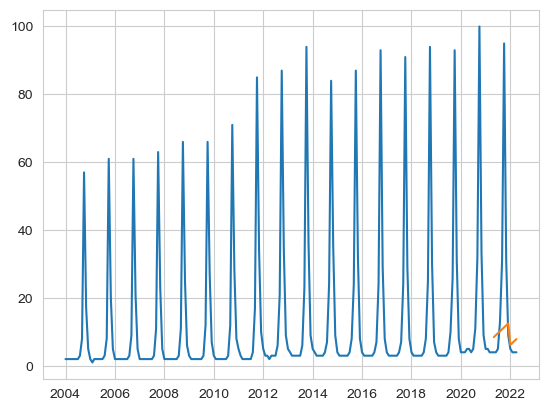

In [49]:
##### code here
plt.plot(pumpkin.Month,pumpkin.pumpkin_trend)
#plt.plot(pump_test.Month,pump_avg+np.roll(pump_diff_avg,0)*pump_test.month)
plt.plot(pump_test.Month,avg_forecast)

In [23]:
### code here

print(pump_diff_avg,np.roll(pump_diff_avg,-4),pump_test.month)

[0.17647059 0.17647059 0.11764706 0.11764706 0.1875     0.125
 0.1875     0.5        1.5        2.6875     1.         0.25      ] [0.1875     0.125      0.1875     0.5        1.5        2.6875
 1.         0.25       0.17647059 0.17647059 0.11764706 0.11764706] 208     5
209     6
210     7
211     8
212     9
213    10
214    11
215    12
216     1
217     2
218     3
219     4
Name: month, dtype: int64


In [46]:
pump_test.index

RangeIndex(start=208, stop=220, step=1)

##### 6. Periodograms

While we can sometimes tell the length of a full cycle for periodic data through visual inspection of the time series or its autocorrelation plot, that is not always possible.

Another tool we can use to identify the number of time steps in a single cycle is the <i>periodogram</i>. Here we mention some of the theory and show how to make and interpret a periodogram using python.

A periodogram first fits the following sum of trigonometric functions:

$$
a_0 + \sum_{p = 1}^{n/2 - 1} \left( a_p \cos\left(2\pi \frac{pt}{n} \right) + b_p \sin\left( 2\pi \frac{pt}{n} \right) \right) + a_{N/2} \cos\left(\pi t \right)
$$

using fast Fourier transforms and then plots $R_p^2 = a_p^2 + b_p^2$ against the frequency for each value of $p$.  

If we recall from trigonometry, for:

$$
A \cos\left(2\pi \omega t \right),
$$

$A$ gives the amplitude and $\omega$ gives the frequency. So a larger value of $R_p^2$ indicates that the amplitude on the trigonometric functions at frequency $p$ must be larger, and thus contributes more to the sum. You can then use the fact that $1/\omega = \text{the period of the trig function}$, to guess what the period of the time series may be. 

You can make a periodogram with `scipy`, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogrdeam.html">https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogrdeam.html</a>.

I will demonstrate with the `bike_train` data set and you should try to make a periodogram for the training data of the `pumpkin` data set.

What seems to be the period of these data according to the periodogram?

In [ ]:
from scipy.signal import periodogram

In [ ]:
## call periodogram then input then the time series
## the first array returned are the frequencies
## the second the value of R_p^2
periodogram(bike_train.bike_interest)

In [ ]:
plt.figure(figsize=(18,6))

plt.scatter(periodogram(bike_train.bike_interest)[0],
                   periodogram(bike_train.bike_interest)[1])

plt.xlabel("$\omega$", fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel("$R_p^2$", fontsize=18)
plt.yticks(fontsize=14)

plt.title("Bike Google Trend Periodogram", fontsize=20)

plt.show()

In [ ]:
## You should round to the nearest time step hered
1/(periodogram(bike_train.bike_interest)[0][np.argmax(periodogram(bike_train.bike_interest)[1])])

In [ ]:
### code here




In [ ]:
## code here



##### References for 6.

To read more about this so called <i>spectral analysis</i> check out:

<a href="https://mybiostats.files.wordpress.com/2015/03/time-series-analysis-and-its-applications-with-examples-in-r.pdf">Time Series Analysis & its Applications</a>, by Robert H. Shumway and David S. Stoffer.

##### 7. Seasonal ARIMA

In our lectures we discussed ARIMA models for data without seasonality, but we mentioned that they can be extended to handle seasonal series as well. In this problem we discuss and demonstrate how.


Recall that for an $\text{ARIMA}(p,d,q)$ model we fit a model with $p$ autoregressive terms and $q$ moving average terms on the time series after it has been differenced $d$ times.

In a seasonal ARIMA model we combine this $(p,d,q)$ process with an equivalent process that accounts for the seasonality. That is we have $\text{SARIMA}(p,d,q)(P,D,Q,m)$, where $m$ is the number of time steps in the cycle. The first $(p,d,q)$ works in the same way as for ARIMA, but now we include a seasonal autoregressive model of order $P$, a seasonal moving average model of order $Q$ and $D$ is the number of times we apply seasonal differencing. Here when we say <i>seasonal autoregressive</i> or <i>seasonal moving average</i> we mean an autoregressive model (or MA model) that skips time steps according to the length of the cycle. For example:

$$
y_t = \beta_1 y_{t - m} + \beta_2 y_{t-2m} + beta_3 y_{t-3m} + \epsilon
$$

is a seasonal moving average model of order 3.

We can fit these using the same `SARIMAX` model object from `statsmodels`. Below I demonstrate how with the `bike` data set and you will do so using the `pumpkin` data set.

In [ ]:
from statsmodels.tsa.api import SARIMAX

In [ ]:
sarima = SARIMAX(bike_train.bike_interest.values,
                    order = (2,0,2),
                    seasonal_order = (1,1,1,12)).fit()

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(bike_train.Month,
            bike_train.bike_interest,
            'b',
            label="Training Set")

plt.plot(bike_train.Month[12:],
            sarima.fittedvalues[12:],
            c='green',
            label="Fit on Training")

plt.plot(bike_test.Month,
            bike_test.bike_interest,
            'r',
            label="Test Set")

plt.plot(bike_test.Month,
            sarima.forecast(len(bike_test)),
            'r.-',
            label="Forecast")

plt.legend(fontsize=14, loc=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("Bike Google Trend Interest", fontsize=16)

plt.show()

In [ ]:
## code here



In [ ]:
## code here




--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)